In [1]:
%load_ext autoreload
%autoreload 2

# Resoto jupyter notebook showcase

Welcome to Resoto!

This is a showcase of how you can interact with resoto using jupyter notebooks.

To get started, let's install the resotonotebook library first (uncomment the next line if you execute this notebook for the first time):

In [2]:
# ! pip install --upgrade pip resotonotebook

After the installation, we need a few imports:

In [3]:
from resotonotebook import ResotoNotebook
from resotonotebook import render_png, render_svg

The main interface is the `ResotoNotebook` class. It provides the methods to search the graph and visualize the results.

To create the `ResotoNotebook` object, we need to pass the URI of the resotocore and a pre shared key (PSK). If you started the resotocore with the `--psk` option (e.g. in your local setup), you can pass None as the PSK: 

In [4]:
rnb = ResotoNotebook("https://localhost:8900", None)

Once we have the `ResotoNotebook` object, we can start performing searches.

For example, we can search all resources for a property with value foo:

In [5]:
rnb.search('"foo"')

,kind,id,tags,name,urn,ctime,age,account_id,region_id,cloud_id,custom_string_attribute,custom_int_attribute,custom_optional_float_attribute,custom_dict_attribute,custom_list_attribute
0,digitalocean_tag,rsto_foo--bar,{},rsto_foo--bar,do:tag:rsto_foo--bar,2022-04-12 15:02:21+00:00,15d21h,10923436,None,do,NaN,NaN,NaN,NaN,NaN
1,example_custom_resource,someExampleResource,{},someExampleResource,NaN,2022-04-12 11:50:32+00:00,16d1h,Example Account,us-west,example,,0.0,10.0,{},"[foo, bar]"


Or using the cli command:

In [6]:
rnb.cli_execute('search "foo"')

,kind,id,tags,name,urn,ctime,age,account_id,region_id,cloud_id,custom_string_attribute,custom_int_attribute,custom_optional_float_attribute,custom_dict_attribute,custom_list_attribute
0,digitalocean_tag,rsto_foo--bar,{},rsto_foo--bar,do:tag:rsto_foo--bar,2022-04-12 15:02:21+00:00,15d21h,10923436,None,do,NaN,NaN,NaN,NaN,NaN
1,example_custom_resource,someExampleResource,{},someExampleResource,NaN,2022-04-12 11:50:32+00:00,16d1h,Example Account,us-west,example,,0.0,10.0,{},"[foo, bar]"


Get number of all collected resources by kind

In [7]:
rnb.search("all").groupby(["kind"])["kind"].count()

kind
cloud                               2
digitalocean_alert_policy           1
digitalocean_cdn_endpoint           1
digitalocean_certificate            1
digitalocean_droplet                7
digitalocean_firewall               4
digitalocean_image                  3
digitalocean_kubernetes_cluster     2
digitalocean_load_balancer          1
digitalocean_network                4
digitalocean_project                3
digitalocean_region                 4
digitalocean_space                  1
digitalocean_ssh_key                2
digitalocean_tag                   18
digitalocean_team                   2
digitalocean_volume                 7
example_account                     1
example_custom_resource             1
example_instance                    2
example_network                     2
example_region                      2
example_volume                      2
graph_root                          1
Name: kind, dtype: int64

Using the cli command:

In [8]:
rnb.cli_execute("search all | count kind")

,0
0,graph_root: 1
1,digitalocean_alert_policy: 1
2,digitalocean_cdn_endpoint: 1
3,digitalocean_certificate: 1
4,digitalocean_load_balancer: 1
5,example_custom_resource: 1
6,example_account: 1
7,digitalocean_space: 1
8,digitalocean_team: 2
9,digitalocean_kubernetes_cluster: 2


Get list of all the compute instances:

In [9]:
rnb.search("is(instance)")

,kind,id,tags,name,ctime,instance_cores,instance_memory,instance_type,instance_status,urn,...,droplet_features,age,account_id,region_id,cloud_id,droplet_image,mtime,atime,last_update,last_access
0,digitalocean_droplet,289061880,"{'k8s': '', 'k8s:worker': '', 'k8s:9a3ac2b5-3e...",analytics-u1wtx,2022-03-03 09:20:38+00:00,2,8192,,running,do:droplet:289061880,...,"[droplet_agent, private_networking]",1mo25d,10225075,ams3,do,NaN,NaT,NaT,NaN,NaN
1,digitalocean_droplet,289061881,"{'k8s': '', 'k8s:worker': '', 'k8s:9a3ac2b5-3e...",analytics-u1wto,2022-03-03 09:20:38+00:00,2,8192,,running,do:droplet:289061881,...,"[droplet_agent, private_networking]",1mo25d,10225075,ams3,do,NaN,NaT,NaT,NaN,NaN
2,digitalocean_droplet,289061882,"{'k8s': '', 'k8s:worker': '', 'k8s:9a3ac2b5-3e...",analytics-u1wtj,2022-03-03 09:20:38+00:00,2,8192,,running,do:droplet:289061882,...,"[droplet_agent, private_networking]",1mo25d,10225075,ams3,do,NaN,NaT,NaT,NaN,NaN
3,digitalocean_droplet,291923577,{},ubuntu-s-1vcpu-1gb-ams3-01,2022-03-23 12:50:45+00:00,1,1024,,unknown,do:droplet:291923577,...,"[droplet_agent, private_networking]",1mo5d,10923436,ams3,do,ubuntu-20-04-x64,NaT,NaT,NaN,NaN
4,digitalocean_droplet,294614223,"{'k8s': '', 'k8s:worker': '', 'k8s:31e9afd3-a8...",helm2-cmxul,2022-04-09 15:07:10+00:00,2,4096,,running,do:droplet:294614223,...,[private_networking],18d21h,10225075,fra1,do,NaN,NaT,NaT,NaN,NaN
5,digitalocean_droplet,294614225,"{'k8s': '', 'k8s:worker': '', 'k8s:31e9afd3-a8...",helm2-cmxut,2022-04-09 15:07:10+00:00,2,4096,,running,do:droplet:294614225,...,[private_networking],18d21h,10225075,fra1,do,NaN,NaT,NaT,NaN,NaN
6,digitalocean_droplet,294614226,"{'k8s': '', 'k8s:worker': '', 'k8s:31e9afd3-a8...",helm2-cmxu6,2022-04-09 15:07:11+00:00,2,4096,,running,do:droplet:294614226,...,[private_networking],18d21h,10225075,fra1,do,NaN,NaT,NaT,NaN,NaN
7,example_instance,someInstance1,"{'Name': 'Example Instance 1', 'expiration': '...",someInstance1,2022-04-12 11:50:31+00:00,4,32,,running,NaN,...,NaN,16d1h,Example Account,us-west,example,NaN,2022-04-12 11:50:31+00:00,2022-04-12 11:50:31+00:00,16d1h,16d1h
8,example_instance,someInstance2,"{'Name': 'Example Instance 2', 'expiration': '...",someInstance2,2019-09-05 10:40:11+00:00,0,0,,stopped,NaN,...,NaN,2yr7mo,Example Account,us-east,example,NaN,NaT,NaT,NaN,NaN


Using the cli command:

In [10]:
rnb.cli_execute("search is(instance)")

,kind,id,tags,name,ctime,instance_cores,instance_memory,instance_type,instance_status,urn,...,droplet_features,age,account_id,region_id,cloud_id,droplet_image,mtime,atime,last_update,last_access
0,digitalocean_droplet,289061882,"{'k8s': '', 'k8s:worker': '', 'k8s:9a3ac2b5-3e...",analytics-u1wtj,2022-03-03 09:20:38+00:00,2,8192,,running,do:droplet:289061882,...,"[droplet_agent, private_networking]",1mo25d,10225075,ams3,do,NaN,NaT,NaT,NaN,NaN
1,digitalocean_droplet,289061881,"{'k8s': '', 'k8s:worker': '', 'k8s:9a3ac2b5-3e...",analytics-u1wto,2022-03-03 09:20:38+00:00,2,8192,,running,do:droplet:289061881,...,"[droplet_agent, private_networking]",1mo25d,10225075,ams3,do,NaN,NaT,NaT,NaN,NaN
2,digitalocean_droplet,289061880,"{'k8s': '', 'k8s:worker': '', 'k8s:9a3ac2b5-3e...",analytics-u1wtx,2022-03-03 09:20:38+00:00,2,8192,,running,do:droplet:289061880,...,"[droplet_agent, private_networking]",1mo25d,10225075,ams3,do,NaN,NaT,NaT,NaN,NaN
3,digitalocean_droplet,294614226,"{'k8s': '', 'k8s:worker': '', 'k8s:31e9afd3-a8...",helm2-cmxu6,2022-04-09 15:07:11+00:00,2,4096,,running,do:droplet:294614226,...,[private_networking],18d21h,10225075,fra1,do,NaN,NaT,NaT,NaN,NaN
4,digitalocean_droplet,294614223,"{'k8s': '', 'k8s:worker': '', 'k8s:31e9afd3-a8...",helm2-cmxul,2022-04-09 15:07:10+00:00,2,4096,,running,do:droplet:294614223,...,[private_networking],18d21h,10225075,fra1,do,NaN,NaT,NaT,NaN,NaN
5,digitalocean_droplet,294614225,"{'k8s': '', 'k8s:worker': '', 'k8s:31e9afd3-a8...",helm2-cmxut,2022-04-09 15:07:10+00:00,2,4096,,running,do:droplet:294614225,...,[private_networking],18d21h,10225075,fra1,do,NaN,NaT,NaT,NaN,NaN
6,digitalocean_droplet,291923577,{},ubuntu-s-1vcpu-1gb-ams3-01,2022-03-23 12:50:45+00:00,1,1024,,unknown,do:droplet:291923577,...,"[droplet_agent, private_networking]",1mo5d,10923436,ams3,do,ubuntu-20-04-x64,NaT,NaT,NaN,NaN
7,example_instance,someInstance1,"{'Name': 'Example Instance 1', 'expiration': '...",someInstance1,2022-04-12 11:50:31+00:00,4,32,,running,NaN,...,NaN,16d1h,Example Account,us-west,example,NaN,2022-04-12 11:50:31+00:00,2022-04-12 11:50:31+00:00,16d1h,16d1h
8,example_instance,someInstance2,"{'Name': 'Example Instance 2', 'expiration': '...",someInstance2,2019-09-05 10:40:11+00:00,0,0,,stopped,NaN,...,NaN,2yr7mo,Example Account,us-east,example,NaN,NaT,NaT,NaN,NaN


Render the acounts as a svg graph:

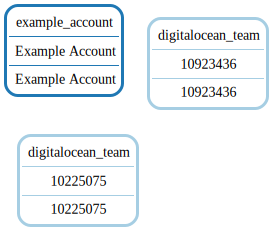

In [11]:
render_svg(rnb.graph("is(account)"))

Make a graph of all the compute instances, and their successors and predessesors and render it as a PNG image:

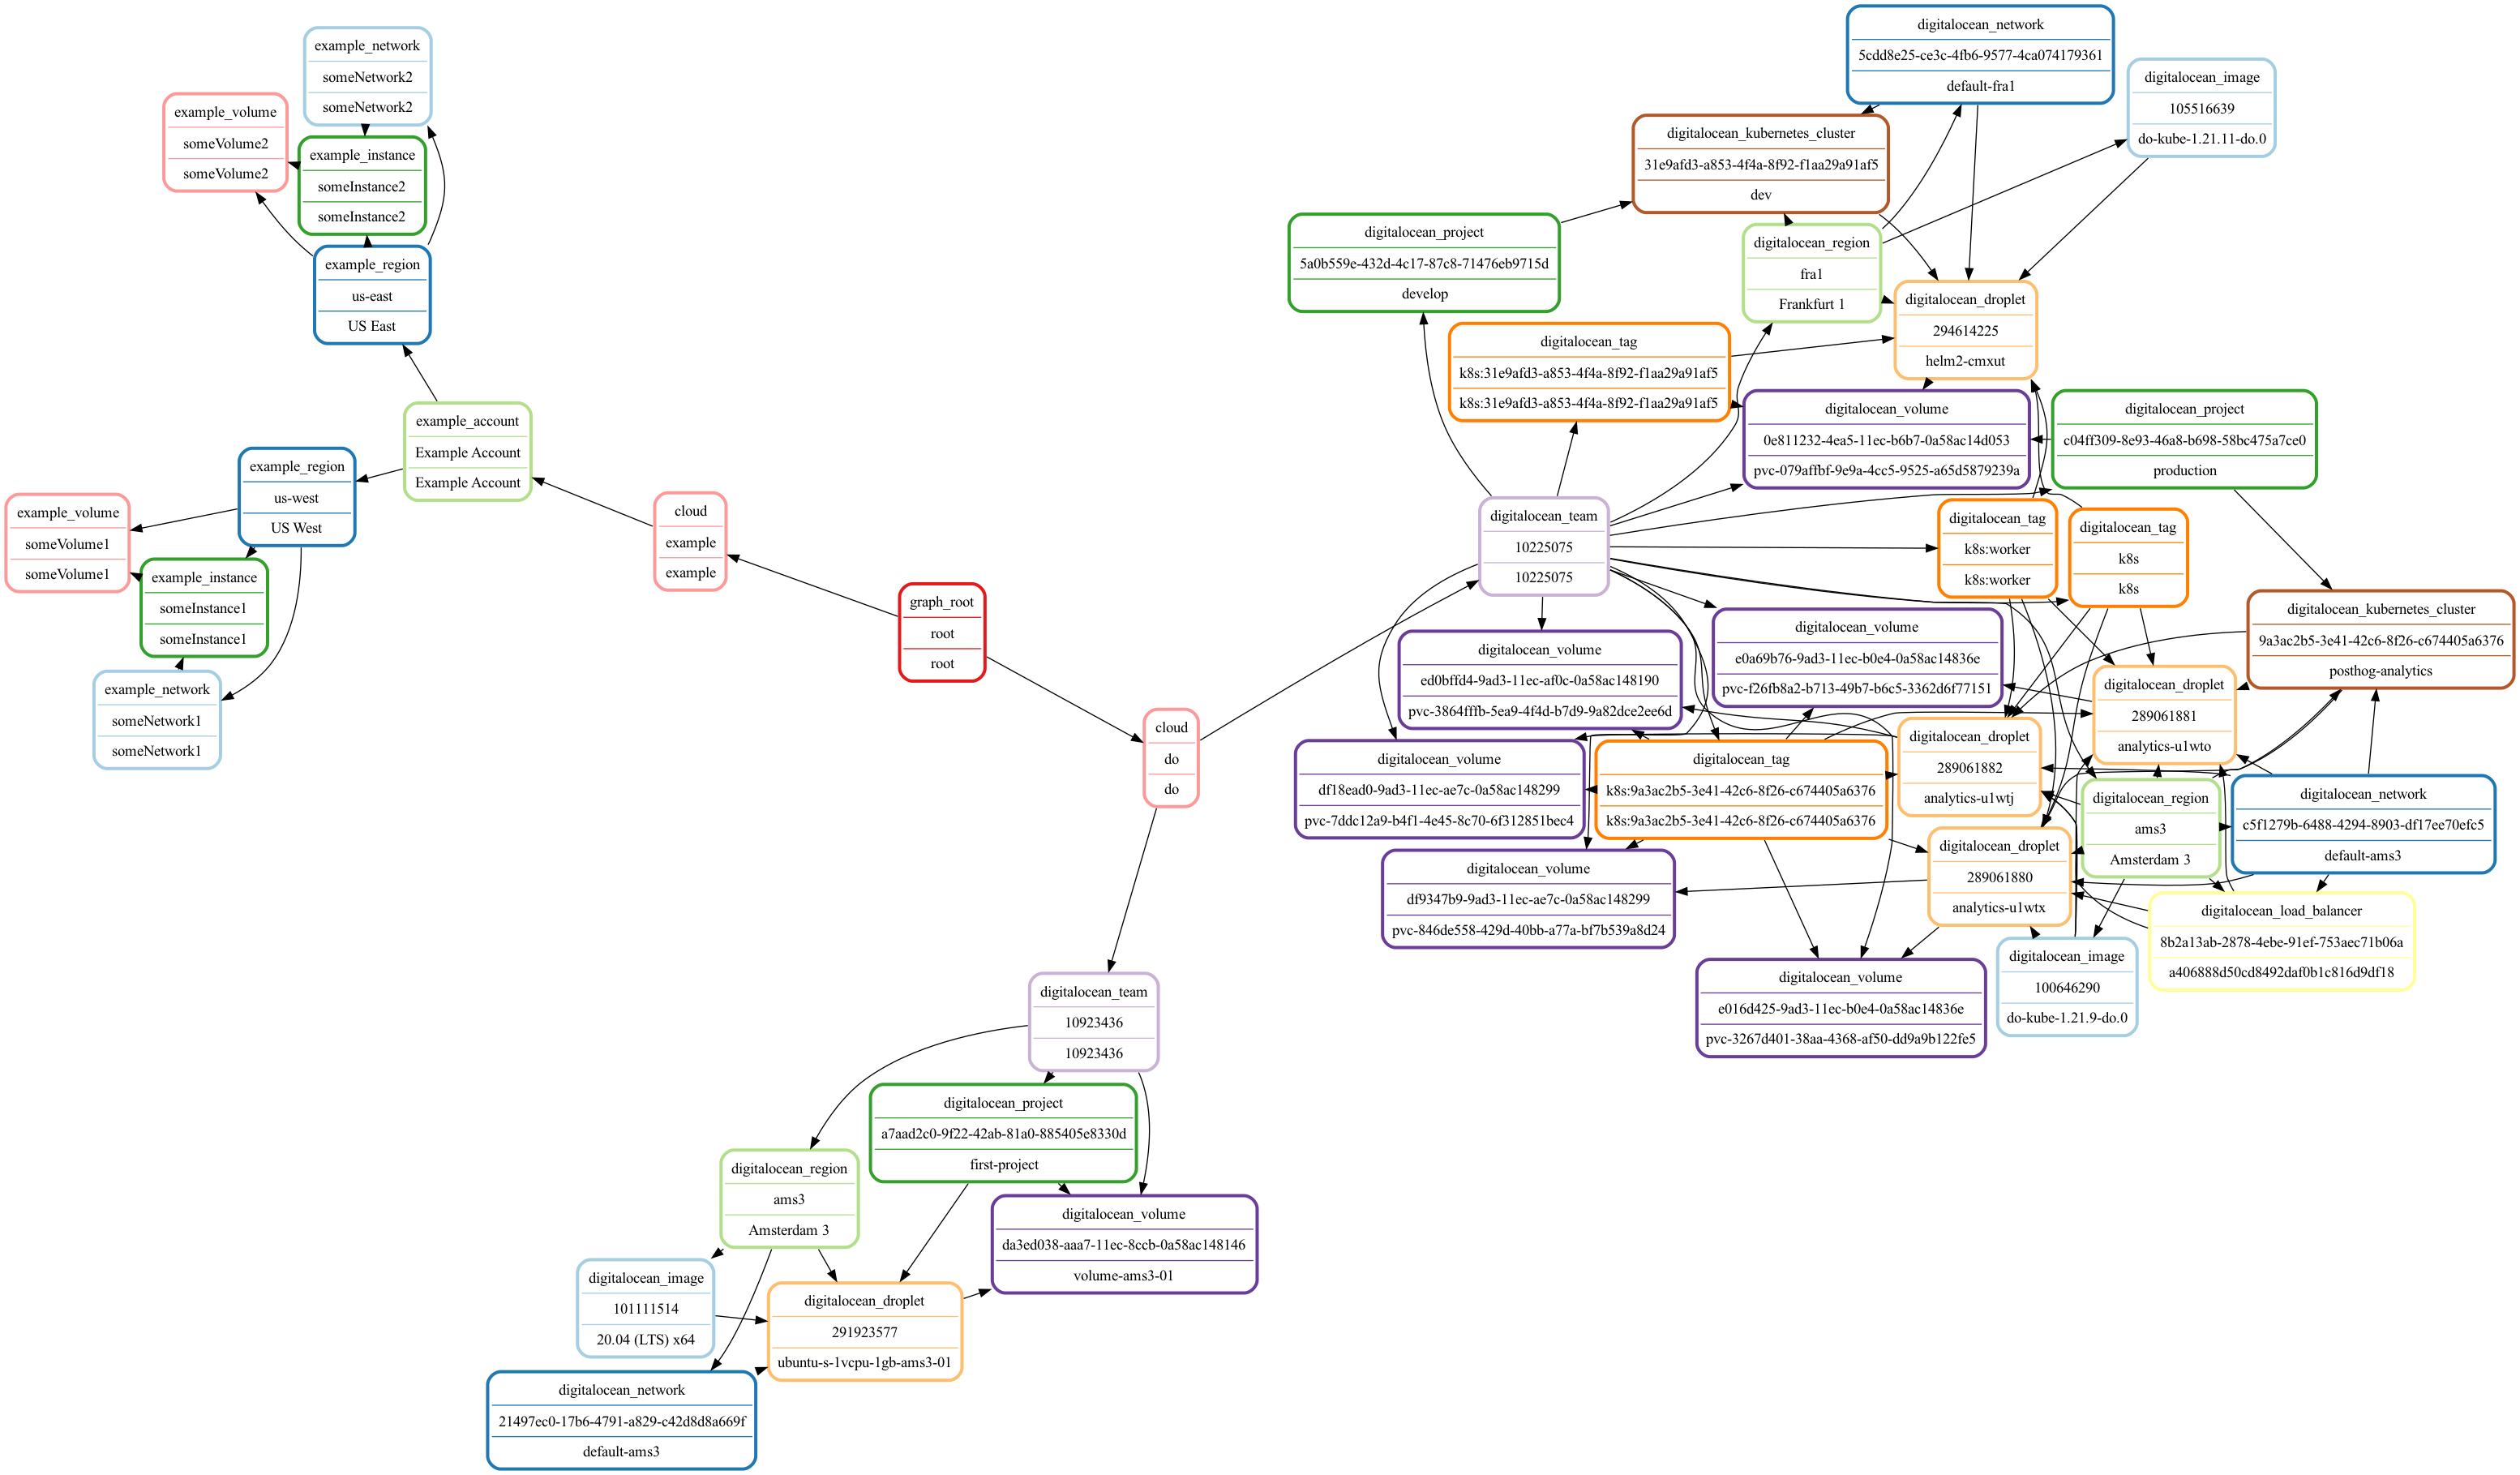

In [12]:
render_png(rnb.graph("is(volume) <-[0:]->"))

Get list of name, type, cores, and memory for each account:

In [13]:
rnb.search("is(instance)")[["name", "instance_type","instance_cores", "instance_memory", "account_id"]]

,name,instance_type,instance_cores,instance_memory,account_id
0,analytics-u1wtx,,2,8192,10225075
1,analytics-u1wto,,2,8192,10225075
2,analytics-u1wtj,,2,8192,10225075
3,ubuntu-s-1vcpu-1gb-ams3-01,,1,1024,10923436
4,helm2-cmxul,,2,4096,10225075
5,helm2-cmxut,,2,4096,10225075
6,helm2-cmxu6,,2,4096,10225075
7,someInstance1,,4,32,Example Account
8,someInstance2,,0,0,Example Account


Using the cli command:

In [14]:
rnb.cli_execute("search is(instance) | list name, instance_type, instance_cores as cores, instance_memory as memory, /ancestors.account.reported.name as account")

,0
0,"name=analytics-u1wtj, instance_type=, cores=2,..."
1,"name=analytics-u1wto, instance_type=, cores=2,..."
2,"name=analytics-u1wtx, instance_type=, cores=2,..."
3,"name=helm2-cmxu6, instance_type=, cores=2, mem..."
4,"name=helm2-cmxul, instance_type=, cores=2, mem..."
5,"name=helm2-cmxut, instance_type=, cores=2, mem..."
6,"name=ubuntu-s-1vcpu-1gb-ams3-01, instance_type..."
7,"name=someInstance1, instance_type=, cores=4, m..."
8,"name=someInstance2, instance_type=, cores=0, m..."


Get a list of instance IDs and their creation times:

In [15]:
rnb.search("is(instance)")[["id", "ctime"]]

,id,ctime
0,289061880,2022-03-03 09:20:38+00:00
1,289061881,2022-03-03 09:20:38+00:00
2,289061882,2022-03-03 09:20:38+00:00
3,291923577,2022-03-23 12:50:45+00:00
4,294614223,2022-04-09 15:07:10+00:00
5,294614225,2022-04-09 15:07:10+00:00
6,294614226,2022-04-09 15:07:11+00:00
7,someInstance1,2022-04-12 11:50:31+00:00
8,someInstance2,2019-09-05 10:40:11+00:00


Using the cli command:

In [16]:
rnb.cli_execute('search is(instance) | list id, ctime')

,0
0,"id=289061882, ctime=2022-03-03T09:20:38Z"
1,"id=289061881, ctime=2022-03-03T09:20:38Z"
2,"id=289061880, ctime=2022-03-03T09:20:38Z"
3,"id=294614226, ctime=2022-04-09T15:07:11Z"
4,"id=294614223, ctime=2022-04-09T15:07:10Z"
5,"id=294614225, ctime=2022-04-09T15:07:10Z"
6,"id=291923577, ctime=2022-03-23T12:50:45Z"
7,"id=someInstance1, ctime=2022-04-12T11:50:31Z"
8,"id=someInstance2, ctime=2019-09-05T10:40:11Z"


Get list of all compute instances with more than two CPU cores:

In [17]:
rnb.search("is(instance) and instance_cores > 2")

,kind,id,tags,name,ctime,mtime,atime,instance_cores,instance_memory,instance_type,instance_status,age,last_update,last_access,account_id,region_id,cloud_id
0,example_instance,someInstance1,"{'Name': 'Example Instance 1', 'expiration': '...",someInstance1,2022-04-12 11:50:31+00:00,2022-04-12 11:50:31+00:00,2022-04-12 11:50:31+00:00,4,32,,running,16d1h,16d1h,16d1h,Example Account,us-west,example


Get list volumes that are not in use, larger than 10GB, older than 30 days, and with no I/O during the past 7 days:


In [18]:
rnb.search("is(volume) and volume_status != in-use and volume_size > 10 and age > 30d and last_access > 7d")

""


Count the number of instances by account ID:

In [19]:
rnb.search("is(instance)").groupby(["account_id"])["account_id"].count()

account_id
10225075           6
10923436           1
Example Account    2
Name: account_id, dtype: int64

Using the cli:

In [20]:
rnb.cli_execute("search is(instance) | count /ancestors.account.reported.id")

,0
0,10923436: 1
1,Example Account: 2
2,10225075: 6
3,total matched: 9
4,total unmatched: 0


Aggregate RAM usage (bytes) data grouped by cloud, account, region, and instance type:

In [21]:
rnb.search("is(instance) and instance_status == running") \
    .groupby(["cloud_id","account_id", "region_id"], as_index=False)[["instance_memory"]] \
    .sum()

,cloud_id,account_id,region_id,instance_memory
0,do,10225075,ams3,24576
1,do,10225075,fra1,12288
2,example,Example Account,us-west,32


Using the cli:

In [22]:
query = """
search is(instance) and instance_status == running | aggregate
  /ancestors.cloud.reported.name as cloud,
  /ancestors.account.reported.name as account,
  /ancestors.region.reported.name as region,
  instance_type as type: sum(instance_memory * 1024 * 1024 * 1024) as memory_bytes
  """
rnb.cli_execute(query)

,group,memory_bytes
0,"{'cloud': 'example', 'account': 'Example Accou...",34359738368
1,"{'cloud': 'do', 'account': '10225075', 'region...",13194139533312
2,"{'cloud': 'do', 'account': '10225075', 'region...",26388279066624
